# Imports

In [17]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pydub import AudioSegment
import wave
import math

# Load data

In [18]:
model_name = 'flowtron'

In [19]:
main_directory = os.getcwd() + "\\..\\datasets\\{}\\\wavs\\".format(model_name)
audio_lengths = []

files = [f for f in os.listdir(main_directory) if os.path.isfile(os.path.join(main_directory, f))]
for f in files:
    audio = AudioSegment.from_file(main_directory + f)
    audio_lengths.append(audio.duration_seconds)

In [20]:
data = pd.DataFrame(audio_lengths, columns=["Length"])
data.head()

,Length
0,1.248299
1,2.882993
2,1.644898
3,0.650703
4,2.830930


In [21]:
data["Length"].describe()

count    7340.000000
mean        2.284778
std         1.310185
min         0.416553
25%         1.388435
50%         1.943810
75%         2.776871
max        10.922358
Name: Length, dtype: float64

# Dataset length (s)

In [22]:
data_audio = data["Length"].sum()
data_audio_formatted = '{} hours {} minutes {} seconds'.format(
    math.floor(data_audio / 3600), 
    math.floor((data_audio % 3600) / 60),
    round((data_audio % 3600) % 60, 1))
print("Total dataset length:", data_audio_formatted)

Total dataset length: 4 hours 39 minutes 30.3 seconds


Text(0.5, 1.0, 'Histogram of audio file lengths in flowtron dataset')

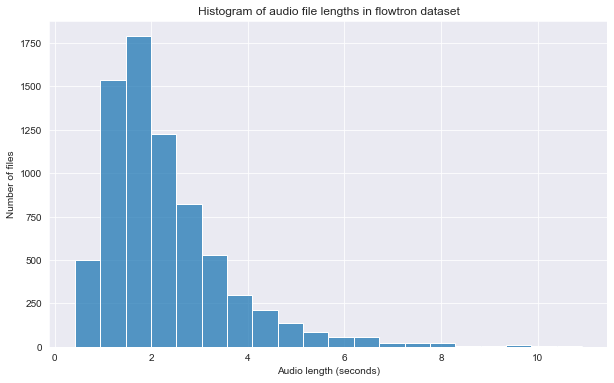

In [23]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(data["Length"], bins=20, kde=False)
plt.xlabel("Audio length (seconds)")
plt.ylabel("Number of files")
plt.title("Histogram of audio file lengths in {} dataset".format(model_name))

# Sample file characteristics

Text(0.5, 1.0, 'Sample audio plot')

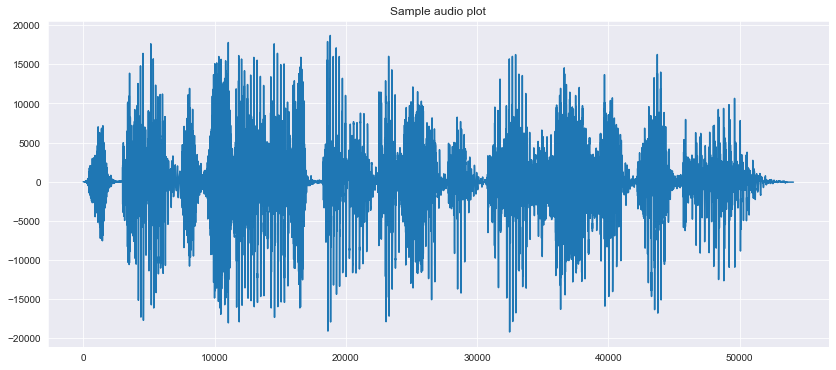

In [24]:
file_name = main_directory + "DIA_ADDON_1013_BANDIT_FROMCAVALORN_15_00.wav"
audio_file = wave.open(file_name, "r")
signal = audio_file.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
plt.figure(figsize=(14, 6))
sns.lineplot(data=signal)
plt.title("Sample audio plot")